In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def generate_two_spirals_dataset(n_points, noise=.5):
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points, 1) * noise
    return (
        np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))),
        np.hstack((np.zeros(n_points), np.ones(n_points)))
    )


def split_dataset(x, y, perc):
    num = round(len(x) * perc)
    return x[:num], y[:num], x[num:], y[num:]


def get_two_spirals_data(n_points, noise=0.5):
    x, y = generate_two_spirals_dataset(n_points, noise=noise)
    indices = torch.arange(0, x.shape[0])
    np.random.shuffle(indices)
    x = x[indices]
    y = y[indices]

    x_train, y_train, x_test, y_test = split_dataset(x, y, 0.9)
    x_train, y_train, x_val, y_val = split_dataset(x_train, y_train, 0.9)
    return x_train, y_train, x_val, y_val, x_test, y_test


In [3]:
x_train, y_train, x_val, y_val, x_test, y_test = get_two_spirals_data(
    500, noise=0)


<ipython-input-3-10d512117641>:1: UserWarning: `x` isn't a recognized object; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  x_train, y_train, x_val, y_val, x_test, y_test = get_two_spirals_data(500, noise=0)


In [4]:
print(list(y_train).count(0) / len(y_train))


0.9061728395061729


In [5]:
def plot_spiral_dataset(x, y):
    plt.title('Spiral dataset')
    one = x[y == 0, :]
    two = x[y == 1, :]
    plt.scatter(*zip(*one), c='lightskyblue', label='class 1')
    plt.scatter(*zip(*two), c='darkorange', label='class 2')
    plt.legend()
    plt.show()


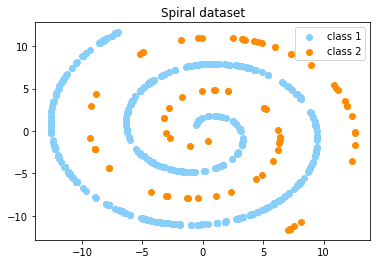

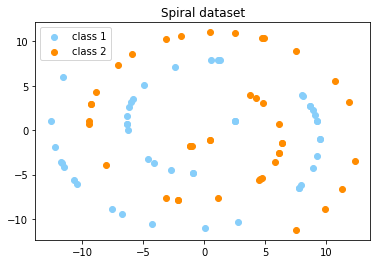

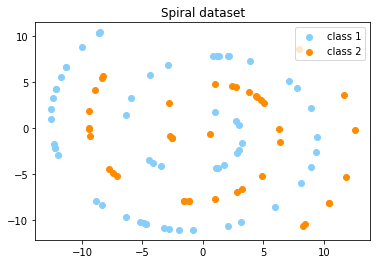

In [6]:
plot_spiral_dataset(x_train, y_train)
plot_spiral_dataset(x_val, y_val)
plot_spiral_dataset(x_test, y_test)
